To predict whether a student can be placed or not based on academic parameter i.e. CGPA

PLACEMENT PREDICTION USING LINEAR REGRESSION

### Importing required libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats as st
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

import seaborn as sns
import pylab
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error as mse, mean_absolute_error as mae,r2_score

#### Reading the Data Set

In [2]:
df=pd.read_csv("C:\\Users\\rupan\\Downloads\\placement.csv")
df

,cgpa,package
0,6.89,3.26
1,5.12,1.98
2,7.82,3.25
3,7.42,3.67
4,6.94,3.57
...,...,...
195,6.93,2.46
196,5.89,2.57
197,7.21,3.24
198,7.63,3.96


In [4]:
temp=np.random.randint(1,50,200)  ## insignificant feature

In [5]:
temp

array([40, 31, 28, 38, 12, 46, 46,  1, 22,  8, 16, 28, 39, 18,  4, 34,  6,
       20, 11, 47, 48, 11, 40, 34,  2,  6, 35, 20,  6, 29, 47, 35, 21, 34,
       28, 27, 22,  2, 30,  9, 10, 36, 25, 48, 22, 38, 32,  6, 22, 38, 28,
       17, 33, 13, 14, 41, 17,  3,  7, 27, 16, 26, 40, 16, 47, 41, 32,  7,
       48,  1, 26, 34, 18, 12, 33, 49, 46, 37, 28, 15, 43, 42,  1, 19, 25,
       31, 35, 14, 34, 24, 24,  1, 38,  4, 34, 33, 46, 46, 23, 45, 48, 49,
       17, 19, 28,  3, 25,  4, 17, 47,  7, 44, 20, 21, 25, 46, 13,  8, 13,
       38, 39, 43,  9, 31, 38, 24, 23, 36,  3, 18, 35, 38, 17,  2, 48,  5,
       24, 18, 36, 28, 10, 30,  7,  3, 38, 11, 37,  5, 27, 12, 28, 10, 43,
       35, 14,  6, 27, 49, 18, 15, 22, 49, 29, 19, 33, 28, 49, 29, 16, 20,
       36, 19,  5,  5, 15, 29, 26,  4, 31, 10, 20, 18,  3, 44,  3,  7, 35,
       37,  5,  9, 10, 42, 43, 40, 49, 48,  8, 30, 21, 44])

In [6]:
df["temp"]=temp

In [ ]:
x=df.drop(columns="package")
y=df["package"]

In [3]:
df.shape ##simple-one predictor and one target

(200, 2)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   cgpa     200 non-null    float64
 1   package  200 non-null    float64
dtypes: float64(2)
memory usage: 3.2 KB


In [5]:
df.isnull().sum()

cgpa       0
package    0
dtype: int64

### assumption 1.linearity: It assumes that target(dependent) and independent have a linear relationship

- If relation is not linear,then it becomes underfitting

Cause of underfitting:

- 1.There is a mismatched between the data and the algorithm
- 2. When Data is insufficient. 

Cause of overfitting:

- 1. Too much training Data

To resolve overfitting:

    1. Ensemble Techniques
    2. Regularization
    3. **Cross Validation(CV)** - Imp

<AxesSubplot:xlabel='cgpa', ylabel='package'>

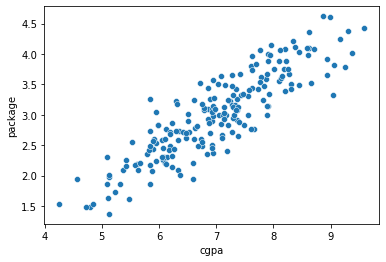

In [6]:
### assumption linearity-showing sort of linear relation
sns.scatterplot(x="cgpa",y="package",data=df)

#### Correlation
- normality
- describe

In [7]:
df.corr()

,cgpa,package
cgpa,1.000000,0.880692
package,0.880692,1.000000


- The first assumption is there , so linear regression perform better on data

#### after preprocessing, seggregate the x and y

In [8]:
x=df[["cgpa"]]
y=df["package"]

#### splitting the data into train and test

In [40]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,)
### if we do not give random state =1,then our r2_score will change after every execution, so to fix it we will use random state

#### Random state is responsible for to generate seed random generator, so that we get same set of train data and test data for different execution

#### checking the shape of training and test data

In [10]:
### training data
print(x_train.shape)
print(y_train.shape)

(160, 1)
(160, 1)


In [11]:
### test data
print(x_test.shape)
print(y_test.shape)

(40, 1)
(40, 1)


In [12]:
lr=LinearRegression()

In [13]:
lr.fit(x_train,y_train)  ###training (labelled data-features)

LinearRegression()

In [14]:
lr.intercept_   ## b which machine learns

array([-1.02068969])

In [15]:
lr.coef_   ## m,optimized value

array([[0.57571493]])

In [16]:
##y=mx+b
y=0.58*x-1.085  ##equation of predicted line or best fit line

### Evaluate the model performance

In [17]:
y_pred=lr.predict(x_test) ##finding the prediction value
print(y_pred)

[[3.76350137]
 [2.92295758]
 [3.45261531]
 [3.06112916]
 [3.13021495]
 [1.77152772]
 [2.87114323]
 [3.5217011 ]
 [2.49117138]
 [2.42208559]
 [3.170515  ]
 [2.99204337]
 [2.37027124]
 [2.56025717]
 [2.3414855 ]
 [3.18202929]
 [3.99378734]
 [2.3414855 ]
 [2.50844283]
 [2.72145735]
 [2.77902884]
 [2.7041859 ]
 [3.55048685]
 [2.46238563]
 [3.33171518]
 [3.51594395]
 [4.37951635]
 [3.9304587 ]
 [2.99780052]
 [2.58328577]
 [3.1129435 ]
 [2.23785681]
 [2.60631436]
 [3.38928667]
 [4.18377327]
 [2.46814278]
 [2.63510011]
 [2.62934296]
 [3.07264346]
 [2.20907106]]


In [18]:
mae1=mae(y_test,y_pred)
mae1

0.29811993815120064

- Actual and prediction difference is 0.29 , somewhat close to 0.

In [19]:
mse1=mse(y_test,y_pred)
mse1

0.13367956416583512

In [20]:
rmse=np.sqrt(mse1)
rmse

0.36562216038669637

In [21]:
r2_score(y_test,y_pred)

0.6862073676761253

- Model accuracy is 72%, not so good.
- From this output, we can say that performance is not good since linear regression model is high biased model.

#### Best Fit Line

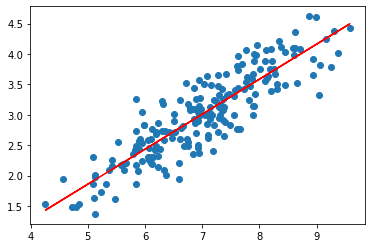

In [22]:
plt.scatter(df["cgpa"],df["package"])
plt.plot(x_train["cgpa"],lr.predict(x_train),color="r")

In [23]:
df1=pd.DataFrame()
df1

""


In [24]:
x_test

,cgpa
26,8.31
74,6.85
109,7.77
177,7.09
197,7.21
143,4.85
141,6.76
194,7.89
135,6.10
97,5.98


In [25]:
df1["x_test"]=x_test["cgpa"]
df1.reset_index(inplace=True)

In [26]:
df1

,index,x_test
0,26,8.31
1,74,6.85
2,109,7.77
3,177,7.09
4,197,7.21
5,143,4.85
6,141,6.76
7,194,7.89
8,135,6.10
9,97,5.98


In [27]:
#df1["y_test"]=y_test  ## mismatched index
#df1

In [28]:
y_test=y_test.reset_index()
y_test

,index,package
0,26,3.42
1,74,3.44
2,109,4.06
3,177,3.64
4,197,3.24
5,143,1.54
6,141,3.18
7,194,3.67
8,135,2.60
9,97,2.84


In [29]:
df1["y_test"]=y_test["package"]
df1

,index,x_test,y_test
0,26,8.31,3.42
1,74,6.85,3.44
2,109,7.77,4.06
3,177,7.09,3.64
4,197,7.21,3.24
5,143,4.85,1.54
6,141,6.76,3.18
7,194,7.89,3.67
8,135,6.10,2.60
9,97,5.98,2.84


In [30]:
y_pred

array([[3.76350137],
       [2.92295758],
       [3.45261531],
       [3.06112916],
       [3.13021495],
       [1.77152772],
       [2.87114323],
       [3.5217011 ],
       [2.49117138],
       [2.42208559],
       [3.170515  ],
       [2.99204337],
       [2.37027124],
       [2.56025717],
       [2.3414855 ],
       [3.18202929],
       [3.99378734],
       [2.3414855 ],
       [2.50844283],
       [2.72145735],
       [2.77902884],
       [2.7041859 ],
       [3.55048685],
       [2.46238563],
       [3.33171518],
       [3.51594395],
       [4.37951635],
       [3.9304587 ],
       [2.99780052],
       [2.58328577],
       [3.1129435 ],
       [2.23785681],
       [2.60631436],
       [3.38928667],
       [4.18377327],
       [2.46814278],
       [2.63510011],
       [2.62934296],
       [3.07264346],
       [2.20907106]])

In [31]:
df1["y_pred"]=y_pred
df1

,index,x_test,y_test,y_pred
0,26,8.31,3.42,3.763501
1,74,6.85,3.44,2.922958
2,109,7.77,4.06,3.452615
3,177,7.09,3.64,3.061129
4,197,7.21,3.24,3.130215
5,143,4.85,1.54,1.771528
6,141,6.76,3.18,2.871143
7,194,7.89,3.67,3.521701
8,135,6.10,2.60,2.491171
9,97,5.98,2.84,2.422086


In [32]:
df1["residual"]=df1["y_test"]-df1["y_pred"]
df1

,index,x_test,y_test,y_pred,residual
0,26,8.31,3.42,3.763501,-0.343501
1,74,6.85,3.44,2.922958,0.517042
2,109,7.77,4.06,3.452615,0.607385
3,177,7.09,3.64,3.061129,0.578871
4,197,7.21,3.24,3.130215,0.109785
5,143,4.85,1.54,1.771528,-0.231528
6,141,6.76,3.18,2.871143,0.308857
7,194,7.89,3.67,3.521701,0.148299
8,135,6.10,2.60,2.491171,0.108829
9,97,5.98,2.84,2.422086,0.417914


In [33]:
df1["residual_square"]=df1["residual"]**2
df1

,index,x_test,y_test,y_pred,residual,residual_square
0,26,8.31,3.42,3.763501,-0.343501,0.117993
1,74,6.85,3.44,2.922958,0.517042,0.267333
2,109,7.77,4.06,3.452615,0.607385,0.368916
3,177,7.09,3.64,3.061129,0.578871,0.335091
4,197,7.21,3.24,3.130215,0.109785,0.012053
5,143,4.85,1.54,1.771528,-0.231528,0.053605
6,141,6.76,3.18,2.871143,0.308857,0.095393
7,194,7.89,3.67,3.521701,0.148299,0.021993
8,135,6.10,2.60,2.491171,0.108829,0.011844
9,97,5.98,2.84,2.422086,0.417914,0.174652


#### For RSS, we need sum of residual square

In [34]:
rss=df1["residual_square"].sum()
rss

5.347182566633405

#### Calculating TSS

In [35]:
df1["y_test"].mean()

2.92025

In [36]:
df1["y_test-y_test_mean"]=df1["y_test"]-3.1045
df1

,index,x_test,y_test,y_pred,residual,residual_square,y_test-y_test_mean
0,26,8.31,3.42,3.763501,-0.343501,0.117993,0.3155
1,74,6.85,3.44,2.922958,0.517042,0.267333,0.3355
2,109,7.77,4.06,3.452615,0.607385,0.368916,0.9555
3,177,7.09,3.64,3.061129,0.578871,0.335091,0.5355
4,197,7.21,3.24,3.130215,0.109785,0.012053,0.1355
5,143,4.85,1.54,1.771528,-0.231528,0.053605,-1.5645
6,141,6.76,3.18,2.871143,0.308857,0.095393,0.0755
7,194,7.89,3.67,3.521701,0.148299,0.021993,0.5655
8,135,6.10,2.60,2.491171,0.108829,0.011844,-0.5045
9,97,5.98,2.84,2.422086,0.417914,0.174652,-0.2645


In [37]:
df1["y_test-y_test_mean_square"]=df1["y_test-y_test_mean"]**2
df1

,index,x_test,y_test,y_pred,residual,residual_square,y_test-y_test_mean,y_test-y_test_mean_square
0,26,8.31,3.42,3.763501,-0.343501,0.117993,0.3155,0.09954
1,74,6.85,3.44,2.922958,0.517042,0.267333,0.3355,0.11256
2,109,7.77,4.06,3.452615,0.607385,0.368916,0.9555,0.91298
3,177,7.09,3.64,3.061129,0.578871,0.335091,0.5355,0.28676
4,197,7.21,3.24,3.130215,0.109785,0.012053,0.1355,0.01836
5,143,4.85,1.54,1.771528,-0.231528,0.053605,-1.5645,2.44766
6,141,6.76,3.18,2.871143,0.308857,0.095393,0.0755,0.00570
7,194,7.89,3.67,3.521701,0.148299,0.021993,0.5655,0.31979
8,135,6.10,2.60,2.491171,0.108829,0.011844,-0.5045,0.25452
9,97,5.98,2.84,2.422086,0.417914,0.174652,-0.2645,0.06996


In [38]:
tss=df1["y_test-y_test_mean_square"].sum() ##TSS
tss

18.398419999999998

In [39]:
r2_square=1-rss/tss
r2_square

0.7093672953094121